In [1]:
import pandas as pd
import numpy as np
import json
from loguru import logger

In [2]:
base_9306=r"C:\Users\jetin\Python_Códigos\API2_fluxo_logistico\Sprint 3\base_9306_URF.csv"

In [3]:
dict_type={'CO_ANO': str,
           'CO_MES': str,
           'CO_SH4': str,
           'CO_NCM': str,
           'SG_UF_NCM': str,
           'NO_URF2': str,
           'VL_FOB': float,
           'NO_VIA': str,
           'NO_PAIS': str,
           'KG_LIQUIDO': float,
           'CADEIA PRODUTIVA': str }

In [5]:
df_9306=pd.read_csv(base_9306, sep=";", dtype=dict_type)

In [16]:
df_9306.head(2)

,CO_ANO,CO_MES,CO_SH4,NO_SH4_POR,CO_NCM,NO_NCM_POR,NO_ISIC_SECAO,SG_UF_NCM,NO_URF2,LAT,LONG,NO_ISIC_CLASSE,VL_FOB,NO_VIA,TIPO,NO_PAIS,KG_LIQUIDO,SG_UNID,CADEIA PRODUTIVA
0,2023,6,9306,Bombas; granadas; torpedos; minas; mísseis; ca...,93062900,"Chumbos para carabinas de ar comprimido, parte...",Indústria de Transformação,SP,PORTO DE SANTOS,-239660408,-463019437,Fabricação de armas e munições,24987.0,MARITIMA,EXPORTAÇÃO,Taiwan (Formosa),1485.0,KGL,Bélica
1,2023,6,9306,Bombas; granadas; torpedos; minas; mísseis; ca...,93062900,"Chumbos para carabinas de ar comprimido, parte...",Indústria de Transformação,SP,PORTO DE SANTOS,-239660408,-463019437,Fabricação de armas e munições,6421.0,MARITIMA,EXPORTAÇÃO,Alemanha,273.0,KGL,Bélica


In [61]:
df_9306.loc[df_9306['NO_PAIS']=='Uruguai']['NO_VIA'].value_counts()

RODOVIARIA        66
MARITIMA          41
AEREA             16
MEIOS PROPRIOS     4
Name: NO_VIA, dtype: int64

In [19]:
cols=['CO_ANO',
      'CO_MES',
      'CO_SH4',
      'NO_PAIS',
      'KG_LIQUIDO']

df_9306_sel=df_9306[cols]

In [20]:
df_9306_sel.head(2)

,CO_ANO,CO_MES,CO_SH4,NO_PAIS,KG_LIQUIDO
0,2023,6,9306,Taiwan (Formosa),1485.0
1,2023,6,9306,Alemanha,273.0


In [21]:
df_9306_sel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4721 entries, 0 to 4720
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CO_ANO      4721 non-null   object 
 1   CO_MES      4721 non-null   object 
 2   CO_SH4      4721 non-null   object 
 3   NO_PAIS     4721 non-null   object 
 4   KG_LIQUIDO  4721 non-null   float64
dtypes: float64(1), object(4)
memory usage: 184.5+ KB


#### Incluindo data, key e separando a base para série temporal

In [22]:
df_9306_sel['DATA_ANO_MES']= df_9306_sel['CO_ANO'] + '-' + df_9306_sel['CO_MES']

C:\Users\jetin\AppData\Local\Temp\ipykernel_10060\3527740588.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_9306_sel['DATA_ANO_MES']= df_9306_sel['CO_ANO'] + '-' + df_9306_sel['CO_MES']


In [23]:
df_9306_sel['DATA']=pd.to_datetime(df_9306_sel['DATA_ANO_MES'], format= '%Y-%m')

C:\Users\jetin\AppData\Local\Temp\ipykernel_10060\2175787346.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_9306_sel['DATA']=pd.to_datetime(df_9306_sel['DATA_ANO_MES'], format= '%Y-%m')


In [25]:
df_9306_sel['SKU_DESTINO']= df_9306_sel['CO_SH4'] + '-' + df_9306_sel['NO_PAIS']

C:\Users\jetin\AppData\Local\Temp\ipykernel_10060\3323936468.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_9306_sel['SKU_DESTINO']= df_9306_sel['CO_SH4'] + '-' + df_9306_sel['NO_PAIS']


In [90]:
chave_exp=['CO_ANO', 'CO_MES','CO_SH4','NO_PAIS', 'DATA', 'SKU_DESTINO']
var_int_exp=['KG_LIQUIDO']

df_9306_group = df_9306_sel.groupby(chave_exp)[var_int_exp].sum().reset_index()

In [91]:
df_9306_group

,CO_ANO,CO_MES,CO_SH4,NO_PAIS,DATA,SKU_DESTINO,KG_LIQUIDO
0,1997,1,9306,Colômbia,1997-01-01,9306-Colômbia,3583.0
1,1997,1,9306,Guiana,1997-01-01,9306-Guiana,1133.0
2,1997,1,9306,Paraguai,1997-01-01,9306-Paraguai,33.0
3,1997,1,9306,Países Baixos (Holanda),1997-01-01,9306-Países Baixos (Holanda),22.0
4,1997,10,9306,Alemanha,1997-10-01,9306-Alemanha,24.0
...,...,...,...,...,...,...,...
3997,2023,6,9306,Lituânia,2023-06-01,9306-Lituânia,18440.0
3998,2023,6,9306,Panamá,2023-06-01,9306-Panamá,9104.0
3999,2023,6,9306,Reino Unido,2023-06-01,9306-Reino Unido,19783.0
4000,2023,6,9306,Suíça,2023-06-01,9306-Suíça,16640.0


In [92]:
df_9306_URUG = df_9306_group.loc[df_9306_group['NO_PAIS']=='Uruguai']

In [95]:
df_9306_URUG.head(2)

,CO_ANO,CO_MES,CO_SH4,NO_PAIS,DATA,SKU_DESTINO,KG_LIQUIDO
29,1997,11,9306,Uruguai,1997-11-01,9306-Uruguai,1420.0
43,1997,12,9306,Uruguai,1997-12-01,9306-Uruguai,10248.0


In [94]:
df_9306_URUG.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109 entries, 29 to 3960
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   CO_ANO       109 non-null    object        
 1   CO_MES       109 non-null    object        
 2   CO_SH4       109 non-null    object        
 3   NO_PAIS      109 non-null    object        
 4   DATA         109 non-null    datetime64[ns]
 5   SKU_DESTINO  109 non-null    object        
 6   KG_LIQUIDO   109 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 6.8+ KB


#### Preenche com zero os valores ausentes de data

In [96]:
def preenche_nans(df: pd.DataFrame, metodo: str):
    """
    Preenche os valores ausentes em um DataFrame.

    Parameters
    ----------
    df : pd.DataFrame
        O DataFrame de entrada.
    metodo : str
        O método a ser usado para preencher os valores ausentes. Pode ser 'ffill', 'bfill' ou 'fillna_zeros'.

    Returns
    -------
    pd.DataFrame
        O DataFrame com os valores ausentes preenchidos.

    Raises
    ------
    ValueError
        Se o método fornecido não for suportado.

    Example
    -------
    >>> df = preenche_nans(df, 'fillna_zeros')
    """
    metodos = {
        'ffill': df.ffill,
        'bfill': df.bfill,
        'fillna_zeros': df.fillna
    }
    
    if metodo not in metodos:
        raise ValueError("Método não suportado: escolha entre 'ffill', 'bfill' ou 'fillna_zeros'")
    if metodo == 'fillna_zeros':
        return metodos[metodo](0)
    
    return metodos[metodo]()

def agrupa_silver(silver_consolidada: pd.DataFrame, params: dict):
    """
    Realiza groupby na silver consolidada e agrega os dados.

    Parameters
    ----------
    silver_consolidada : pd.DataFrame
        O DataFrame da silver consolidada.
    params : dict
        Um dicionário com parâmetros do cliente.

    Returns
    -------
    pd.DataFrame
        A silver consolidada após a agregação.

    Example
    -------
    >>> params = {
    ...     'colunas_gb': ['coluna1', 'coluna2'],
    ...     'join_colunas_var': '-',
    ...     'coluna_data': 'data',
    ...     'frequencia_agrupamento': 'M',
    ...     'agg_dict': {'coluna3': 'mean', 'coluna4': 'sum'}
    ... }
    >>> silver_agrupada = agrupa_silver(silver_consolidada, params)
    """
    logger.info("Agrupando dados da silver...")
    nome_colunas = '-'.join(params['colunas_gb'])
    silver_consolidada[nome_colunas] = silver_consolidada[params['colunas_gb']].apply(lambda x: params['join_colunas_var'].join(x), axis=1)
    
    gb_args = [nome_colunas] + [pd.Grouper(key=params['coluna_data'], 
                                           freq=params['frequencia_agrupamento'])]

    silver_agrupada = silver_consolidada.groupby(gb_args).agg(params['agg_dict']).reset_index()

    return silver_agrupada

def insere_datas_ausentes(df: pd.DataFrame, params: dict):
    """
    Insere linhas de datas ausentes em um DataFrame.

    Parameters
    ----------
    df : pd.DataFrame
        O DataFrame de entrada.
    params : dict
        Um dicionário com parâmetros do cliente.

    Returns
    -------
    pd.DataFrame
        O DataFrame com as datas ausentes preenchidas.

    Example
    -------
    >>> params = {
    ...     'colunas_gb': ['coluna1', 'coluna2'],
    ...     'coluna_data': 'data',
    ...     'frequencia_agrupamento': 'D'
    ... }
    >>> df_com_datas = insere_datas_ausentes(df, params)
    """
    logger.info('Inserindo datas faltantes...')
    col = '-'.join(params['colunas_gb'])
    dfs = []
    data_max = df[params['coluna_data']].max()
    for item in df[col].unique():
        temp = df[df[col] == item].copy()
        temp.set_index(params['coluna_data'], inplace=True)
        complete_date_range = pd.date_range(start=temp.index.min(), 
                                            end=data_max, 
                                            freq=params['frequencia_agrupamento'])

        temp = temp.reindex(complete_date_range)
        temp[col] = temp[col].ffill()
        temp = preenche_nans(temp, metodo='fillna_zeros')
        dfs.append(temp)

    df_com_datas = pd.concat(dfs).reset_index().rename(columns={'index': params['coluna_data']})
    return df_com_datas

def gera_serie_temporal(df: pd.DataFrame, params: dict):
    """
    Função principal para gerar uma série temporal.

    Parameters
    ----------
    df : pd.DataFrame
        O DataFrame de entrada.
    params : dict
        Um dicionário com parâmetros do cliente.

    Returns
    -------
    pd.DataFrame
        A série temporal gerada.

    Example
    -------
    >>> params = {
    ...     'colunas_gb': ['coluna1', 'coluna2'],
    ...     'join_colunas_var': '-',
    ...     'coluna_data': 'data',
    ...     'frequencia_agrupamento': 'D',
    ...     'agg_dict': {'coluna3': 'mean', 'coluna4': 'sum'}
    ... }
    >>> st = gera_serie_temporal(df, params)
    """
    st = agrupa_silver(df, params)
    st = insere_datas_ausentes(st, params)
    logger.success("Série temporal gerada")

    return st


In [97]:
params = {
'colunas_gb': ['SKU_DESTINO'],
'join_colunas_var': '-',
'coluna_data': 'DATA',
'frequencia_agrupamento': 'MS',
'agg_dict': {'KG_LIQUIDO': 'sum'}
 }

In [98]:
df_st_9306_URUG=gera_serie_temporal(df_9306_URUG, params)

2023-11-25 13:39:41.032 | INFO     | __main__:agrupa_silver:66 - Agrupando dados da silver...
C:\Users\jetin\AppData\Local\Temp\ipykernel_10060\569256599.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  silver_consolidada[nome_colunas] = silver_consolidada[params['colunas_gb']].apply(lambda x: params['join_colunas_var'].join(x), axis=1)
2023-11-25 13:39:41.054 | INFO     | __main__:insere_datas_ausentes:102 - Inserindo datas faltantes...
2023-11-25 13:39:41.065 | SUCCESS  | __main__:gera_serie_temporal:150 - Série temporal gerada


In [99]:
df_st_9306_URUG.head()

,DATA,SKU_DESTINO,KG_LIQUIDO
0,1997-02-01,9306-Uruguai,7551.0
1,1997-03-01,9306-Uruguai,0.0
2,1997-04-01,9306-Uruguai,0.0
3,1997-05-01,9306-Uruguai,0.0
4,1997-06-01,9306-Uruguai,0.0


#### Predição da serie temporal

In [100]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima

In [101]:
# Converta a coluna de datas para o tipo apropriado
df_st_9306_URUG.set_index('DATA', inplace=True)

In [102]:
df_9306_URUG = df_st_9306_URUG.drop(columns=['SKU_DESTINO'])

In [103]:
# Treine o modelo AutoARIMA até a última data disponível
modelo_autoarima = auto_arima(df_9306_URUG, start_p=1, start_q=1, max_p=3, max_q=3, m=12, seasonal=True, trace=True)
modelo = SARIMAX(df_9306_URUG, order=modelo_autoarima.order, seasonal_order=modelo_autoarima.seasonal_order)
resultado = modelo.fit(disp=False)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,0,1)[12] intercept   : AIC=6390.165, Time=0.43 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=6389.577, Time=0.03 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=6386.448, Time=0.13 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=6386.443, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=6436.724, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=6388.024, Time=0.05 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=6388.235, Time=0.23 sec
 ARIMA(0,0,1)(0,0,2)[12] intercept   : AIC=6388.405, Time=0.28 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=6386.279, Time=0.12 sec
 ARIMA(0,0,1)(2,0,0)[12] intercept   : AIC=6388.279, Time=0.43 sec
 ARIMA(0,0,1)(2,0,1)[12] intercept   : AIC=6390.221, Time=0.44 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=6388.551, Time=0.09 sec
 ARIMA(1,0,1)(1,0,0)[12] intercept   : AIC=6388.188, Time=0.29 sec
 ARIMA(0,0,2)(1,0,0)[12] intercept   : AIC=6388.297, Time=0.14 sec
 ARIMA(1,0,2)(1,0,0

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [104]:
# Faça previsões a partir da última data no conjunto de dados
passos_para_prever = 24  # ou o número desejado de passos à frente
previsoes = resultado.get_forecast(steps=passos_para_prever)
previsao_intervalo = previsoes.conf_int()

In [105]:
# Crie um DataFrame com as datas futuras e as previsões
datas_futuras = pd.date_range(start=df_9306_URUG.index[-1], periods=passos_para_prever+1, freq='M')[1:]
df_PRED_URUG = pd.DataFrame(index=datas_futuras, columns=['KG_LIQUIDO_PRED', 'IF_KG_LIQUIDO_PRED', 'IS_KG_LIQUIDO_PRED'])
df_PRED_URUG['KG_LIQUIDO_PRED'] = previsoes.predicted_mean.values
df_PRED_URUG[['IF_KG_LIQUIDO_PRED', 'IS_KG_LIQUIDO_PRED']] = previsao_intervalo.values

In [106]:
# Exiba as previsões
df_PRED_URUG.head()

,KG_LIQUIDO_PRED,IF_KG_LIQUIDO_PRED,IS_KG_LIQUIDO_PRED
2023-03-31,1.113714e+03,-12496.957731,14724.385109
2023-04-30,-3.703421e-21,-13816.131419,13816.131419
2023-05-31,1.246439e+03,-12569.692817,15062.570021
2023-06-30,-1.273395e-39,-13816.131419,13816.131419
2023-07-31,3.603772e+02,-13455.754205,14176.508634


In [107]:
df_9306_URUG_2020 = df_9306_URUG.loc['2020-01-01':]

In [108]:
import matplotlib.pyplot as plt

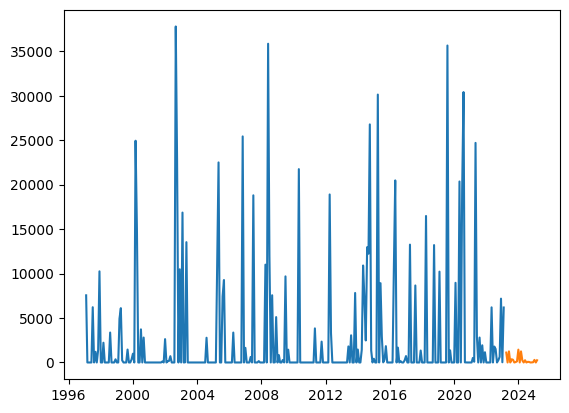

In [109]:
plt.plot(df_9306_URUG)
plt.plot(df_PRED_URUG['KG_LIQUIDO_PRED'])
plt.show()

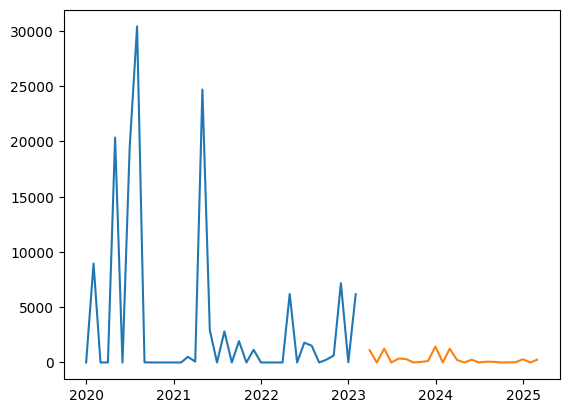

In [110]:
plt.plot(df_9306_URUG_2020)
plt.plot(df_PRED_URUG['KG_LIQUIDO_PRED'])
plt.show()

In [ ]:
|SH4|DESTINO|DATA FUTURO|QTDADE ESPERADA|

In [111]:
df_9306.head(2)

,CO_ANO,CO_MES,CO_SH4,NO_SH4_POR,CO_NCM,NO_NCM_POR,NO_ISIC_SECAO,SG_UF_NCM,NO_URF2,LAT,LONG,NO_ISIC_CLASSE,VL_FOB,NO_VIA,TIPO,NO_PAIS,KG_LIQUIDO,SG_UNID,CADEIA PRODUTIVA
0,2023,6,9306,Bombas; granadas; torpedos; minas; mísseis; ca...,93062900,"Chumbos para carabinas de ar comprimido, parte...",Indústria de Transformação,SP,PORTO DE SANTOS,-239660408,-463019437,Fabricação de armas e munições,24987.0,MARITIMA,EXPORTAÇÃO,Taiwan (Formosa),1485.0,KGL,Bélica
1,2023,6,9306,Bombas; granadas; torpedos; minas; mísseis; ca...,93062900,"Chumbos para carabinas de ar comprimido, parte...",Indústria de Transformação,SP,PORTO DE SANTOS,-239660408,-463019437,Fabricação de armas e munições,6421.0,MARITIMA,EXPORTAÇÃO,Alemanha,273.0,KGL,Bélica


In [131]:
chave_exp=['CO_MES','CO_SH4','NO_PAIS','NO_VIA']
var_int_exp=['KG_LIQUIDO']

df_9306_classif_group = df_9306.groupby(chave_exp)[var_int_exp].sum().reset_index()

In [112]:
df_9306_classif = df_9306[['CO_MES','CO_SH4','NO_PAIS','NO_VIA','KG_LIQUIDO']]

In [132]:
df_9306_classif_group

,CO_MES,CO_SH4,NO_PAIS,NO_VIA,KG_LIQUIDO
0,1,9306,Alemanha,AEREA,21464.0
1,1,9306,Alemanha,MARITIMA,808719.0
2,1,9306,Angola,AEREA,32.0
3,1,9306,Angola,MARITIMA,139.0
4,1,9306,Argentina,AEREA,494.0
...,...,...,...,...,...
1284,9,9306,Zimbábue,AEREA,330.0
1285,9,9306,África do Sul,AEREA,28.0
1286,9,9306,África do Sul,MARITIMA,48379.0
1287,9,9306,Áustria,MARITIMA,44166.0


In [114]:
#df_9306_classif_URUG= df_9306_classif.loc[df_9306_classif['NO_PAIS']=='Uruguai']

In [133]:
from sklearn.preprocessing import LabelEncoder

In [162]:
# Initialize LabelEncoder
label_encoder_mes = LabelEncoder()

df_9306_classif_group['CO_MES_encoded'] = label_encoder_mes.fit_transform(df_9306_classif_group['CO_MES'])

In [163]:
# Initialize LabelEncoder
label_encoder_sh4 = LabelEncoder()

df_9306_classif_group['CO_SH4_encoded'] = label_encoder_sh4.fit_transform(df_9306_classif_group['CO_SH4'])

In [164]:
# Initialize LabelEncoder
label_encoder_pais = LabelEncoder()

df_9306_classif_group['NO_PAIS_encoded'] = label_encoder_pais.fit_transform(df_9306_classif_group['NO_PAIS'])

In [165]:
# Initialize LabelEncoder
label_encoder_via = LabelEncoder()

df_9306_classif_group['NO_VIA_encoded'] = label_encoder_via.fit_transform(df_9306_classif_group['NO_VIA'])

In [139]:
df_9306_classif_group

,CO_MES,CO_SH4,NO_PAIS,NO_VIA,KG_LIQUIDO,CO_MES_encoded,CO_SH4_encoded,NO_PAIS_encoded,NO_VIA_encoded
0,1,9306,Alemanha,AEREA,21464.0,0,0,0,0
1,1,9306,Alemanha,MARITIMA,808719.0,0,0,0,3
2,1,9306,Angola,AEREA,32.0,0,0,1,0
3,1,9306,Angola,MARITIMA,139.0,0,0,1,3
4,1,9306,Argentina,AEREA,494.0,0,0,2,0
...,...,...,...,...,...,...,...,...,...
1284,9,9306,Zimbábue,AEREA,330.0,11,0,114,0
1285,9,9306,África do Sul,AEREA,28.0,11,0,115,0
1286,9,9306,África do Sul,MARITIMA,48379.0,11,0,115,3
1287,9,9306,Áustria,MARITIMA,44166.0,11,0,116,3


In [140]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [141]:
X = df_9306_classif_group[['KG_LIQUIDO', 'CO_MES_encoded', 'CO_SH4_encoded', 'NO_PAIS_encoded']]
y = df_9306_classif_group['NO_VIA_encoded']

In [142]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [143]:
# Instantiate XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective="multi:softmax", random_state=42)

In [144]:
# Train the classifier
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softmax', ...)

In [145]:
# Make predictions on the test set
y_pred = xgb_classifier.predict(X_test)

In [146]:
# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.84


In [147]:
X_test.head(2)

,KG_LIQUIDO,CO_MES_encoded,CO_SH4_encoded,NO_PAIS_encoded
1121,61.0,10,0,65
1186,11422.0,11,0,11


In [148]:
df_final = df_PRED_URUG.reset_index()

In [149]:
df_final['CO_MES']=df_final['index'].dt.strftime('%m')

In [153]:
df_final.rename(columns={'KG_LIQUIDO_PRED' : 'KG_LIQUIDO'}, inplace=True)

In [159]:
df_final['CO_SH4']='9306'
df_final['NO_PAIS']='Uruguai'

In [160]:
df_final.head(2)

,index,KG_LIQUIDO,IF_KG_LIQUIDO_PRED,IS_KG_LIQUIDO_PRED,CO_MES,CO_SH4,NO_PAIS
0,2023-03-31,1.113714e+03,-12496.957731,14724.385109,03,9306,Uruguai
1,2023-04-30,-3.703421e-21,-13816.131419,13816.131419,04,9306,Uruguai


In [161]:
#df_final.drop(columns=['index','Intervalo Inferior','Intervalo Superior'], inplace=True)

In [166]:
df_final['CO_MES_encoded'] = label_encoder_mes.fit_transform(df_final['CO_MES'])

In [167]:
df_final['CO_SH4_encoded'] = label_encoder_sh4.transform(df_final['CO_SH4'])

In [168]:
df_final['NO_PAIS_encoded'] = label_encoder_pais.transform(df_final['NO_PAIS'])

In [169]:
df_final[['KG_LIQUIDO','CO_MES_encoded','CO_SH4_encoded','NO_PAIS_encoded']].head()

,KG_LIQUIDO,CO_MES_encoded,CO_SH4_encoded,NO_PAIS_encoded
0,1.113714e+03,2,0,112
1,-3.703421e-21,3,0,112
2,1.246439e+03,4,0,112
3,-1.273395e-39,5,0,112
4,3.603772e+02,6,0,112


In [170]:
df_final['VIA_PRED']=xgb_classifier.predict(df_final[['KG_LIQUIDO','CO_MES_encoded','CO_SH4_encoded','NO_PAIS_encoded']])

In [171]:
df_final['VIA_PRED_PROB']=xgb_classifier.predict_proba(df_final[['KG_LIQUIDO','CO_MES_encoded','CO_SH4_encoded','NO_PAIS_encoded']]).max(axis=1)

In [174]:
df_final['NO_VIA_PRED']=label_encoder_via.inverse_transform(df_final['VIA_PRED'])

In [179]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [183]:
df_9306_final = df_final[['NO_PAIS','index','KG_LIQUIDO','IF_KG_LIQUIDO_PRED','IS_KG_LIQUIDO_PRED','NO_VIA_PRED','VIA_PRED_PROB']]

In [187]:
df_9306_final['CO_SH4']='9306'
df_9306_final['NO_SH4_POR']='Bombas; granadas; torpedos; minas; mísseis; cartuchos e outras munições e projécteis; e suas partes; incluídos os zagalotes; chumbos de caça e buchas para cartuchos'
df_9306_final['NO_ISIC_SECAO']='Indústria de Transformação'
df_9306_final['NO_ISIC_CLASSE']='Fabricação de armas e munições'
df_9306_final['SG_UNID']='KGL'
df_9306_final['CADEIA PRODUTIVA']='Bélica'

C:\Users\jetin\AppData\Local\Temp\ipykernel_10060\4116058466.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_9306_final['CO_SH4']='9306'
C:\Users\jetin\AppData\Local\Temp\ipykernel_10060\4116058466.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_9306_final['NO_SH4_POR']='Bombas; granadas; torpedos; minas; mísseis; cartuchos e outras munições e projécteis; e suas partes; incluídos os zagalotes; chumbos de caça e buchas para cartuchos'
C:\Users\jetin\AppData\Local\Temp\ipykernel_10060\4116058466

In [188]:
df_9306_final.head()

,NO_PAIS,index,KG_LIQUIDO,IF_KG_LIQUIDO_PRED,IS_KG_LIQUIDO_PRED,NO_VIA_PRED,VIA_PRED_PROB,CO_SH4,NO_SH4_POR,NO_ISIC_SECAO,NO_ISIC_CLASSE,SG_UNID,CADEIA PRODUTIVA
0,Uruguai,2023-03-31,1113.714,-12496.958,14724.385,AEREA,0.925,9306,Bombas; granadas; torpedos; minas; mísseis; ca...,Indústria de Transformação,Fabricação de armas e munições,KGL,Bélica
1,Uruguai,2023-04-30,-0.000,-13816.131,13816.131,AEREA,0.989,9306,Bombas; granadas; torpedos; minas; mísseis; ca...,Indústria de Transformação,Fabricação de armas e munições,KGL,Bélica
2,Uruguai,2023-05-31,1246.439,-12569.693,15062.570,MEIOS PROPRIOS,0.525,9306,Bombas; granadas; torpedos; minas; mísseis; ca...,Indústria de Transformação,Fabricação de armas e munições,KGL,Bélica
3,Uruguai,2023-06-30,-0.000,-13816.131,13816.131,AEREA,0.992,9306,Bombas; granadas; torpedos; minas; mísseis; ca...,Indústria de Transformação,Fabricação de armas e munições,KGL,Bélica
4,Uruguai,2023-07-31,360.377,-13455.754,14176.509,AEREA,0.995,9306,Bombas; granadas; torpedos; minas; mísseis; ca...,Indústria de Transformação,Fabricação de armas e munições,KGL,Bélica


In [189]:
# salvando base SP - NCM - URF
df_9306_final.to_csv('base_9306_final.csv', index=False)